In [1]:
import pandas as pd
import numpy as np
random_state=42
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y=make_moons(n_samples=1000, noise=0.3,random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
tree_clf=DecisionTreeClassifier(max_depth=1, random_state=42)
# weak training function with depth of 1

In [9]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [10]:
y_pred_tree=tree_clf.predict(X_test)

In [11]:
accuracy_score(y_pred_tree, y_test)

0.77

Ada Boosting or Adaptive Boosting is a kind of ensemble method where predictors work in series, and the new predictor corrects the works of the previous predictor. This is done by adding more weight to the instances (rows) that the previous predictor misclassified. This increase in weight is called learning. Low rates of learning leads to underfitting and high rates of learning lead to overfitting of these instances. 

In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate=.5,
    random_state=42
)

In [13]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [14]:
y_pred_ada=ada_clf.predict(X_test)

In [15]:
accuracy_score(y_pred_ada, y_test)

0.92

In [16]:
for r in np.arange(.1, 1, 0.1):
    ada_clf=AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm='SAMME.R',
        learning_rate=r,
        random_state=42
    )
    ada_clf.fit(X_train, y_train)
    y_pred_ada=ada_clf.predict(X_test)
    print(r, accuracy_score(y_pred_ada, y_test))

0.1 0.925
0.2 0.925
0.30000000000000004 0.92
0.4 0.92
0.5 0.92
0.6 0.92
0.7000000000000001 0.925
0.8 0.925
0.9 0.92


Painting a picture of how it works:

In [17]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

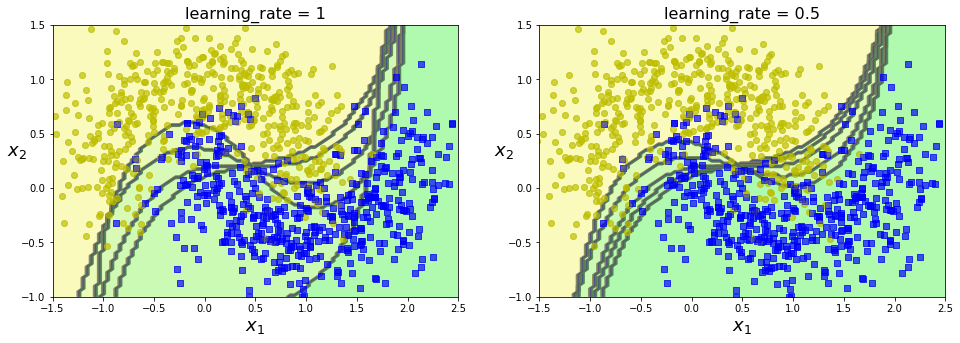

In [18]:
from sklearn.svm import SVC
m = len(X_train)

plt.figure(figsize=(16, 5))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.show()